In [3]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

pd.set_option('display.max_rows', None)

In [8]:
knu_morphemes_words = pd.read_csv('../files/merged_morfems_knu.txt', delimiter='\t', encoding='utf-8', index_col=False)

In [9]:
knu_morphemes_words.head()

,Unnamed: 0,wrdFK,mname,mseg,merged_morphemes
0,0,20,['R'],['аби'],аби
1,1,21,"['R', 'X']","['аби', '-то']",аби/-то
2,2,23,['R'],['або'],або
3,3,24,"['R', 'R', 'F']","['або', 'щ', 'о']",або/щ/о
4,4,26,['R'],['авраам'],авраам


In [6]:
words = knu_morphemes_words['merged_morphemes'].values

In [10]:
words_df = pd.DataFrame({'raw_words': words})

In [11]:
words_df['morphemes'] = words_df['raw_words'].apply(lambda x: x.split('/'))
words_df['n_morphemes'] = words_df['morphemes'].apply(lambda x: len(x))
words_df['n_letters'] = words_df['raw_words'].apply(lambda x: len(x)) - words_df['n_morphemes'] + 1

words_df['letter_by_morphemes'] = words_df['n_letters']/words_df['n_morphemes']

In [12]:
morphemes = words_df['morphemes'].explode().reset_index(drop=True)

In [13]:
morphemes_val_count = morphemes.value_counts().reset_index()

In [14]:
len(morphemes_val_count)

30299

In [15]:
morphemes_val_count[:20]

,morphemes,count
0,ий,49188
1,ти,47658
2,а,42518
3,н,39951
4,о,36496
5,ува,17926
6,я,17526
7,к,14099
8,ся,13980
9,и,13893


In [16]:
words_df.head(10)

,raw_words,morphemes,n_morphemes,n_letters,letter_by_morphemes
0,аби,[аби],1,3,3.000000
1,аби/-то,"[аби, -то]",2,6,3.000000
2,або,[або],1,3,3.000000
3,або/щ/о,"[або, щ, о]",3,5,1.666667
4,авраам,[авраам],1,6,6.000000
5,агар/ян/ськ/ий,"[агар, ян, ськ, ий]",4,11,2.750000
6,адам,[адам],1,4,4.000000
7,а/кафіст,"[а, кафіст]",2,7,3.500000
8,алілуjа,[алілуjа],1,7,7.000000
9,алмаз,[алмаз],1,5,5.000000


# Analysis

In [17]:
print(f"Total words - {len(words_df)}")

Total words - 205218


In [18]:
print(f"Total morphemes - {len(morphemes)}")

Total morphemes - 797425


In [19]:
print(f"Avg morphemes per word - {words_df['n_morphemes'].mean()}")

Avg morphemes per word - 3.885745889736768


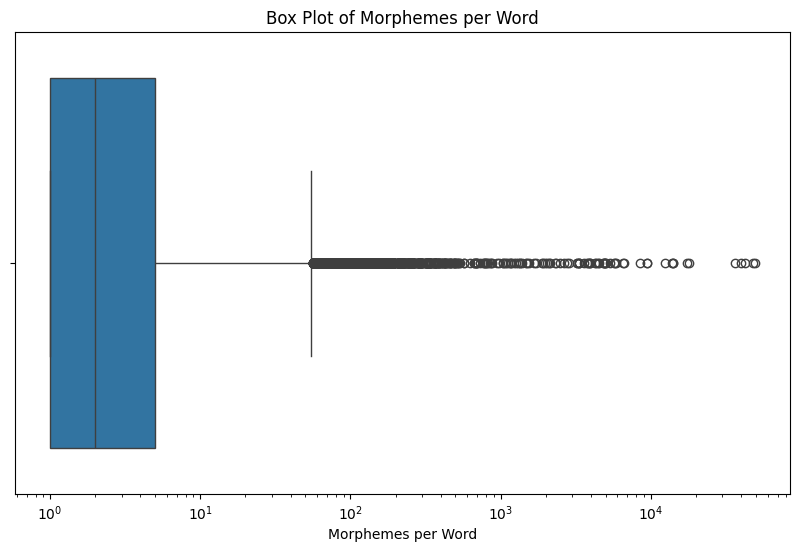

In [20]:
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(x=morphemes_val_count['count'], log_scale=True)

# Labels and title
plt.xlabel("Morphemes per Word")
plt.title("Box Plot of Morphemes per Word")

plt.show()

### Number of morphemes

In [21]:
n_morphemes_value_counts = words_df['n_morphemes'].value_counts()

In [22]:
n_morphemes_value_counts.head()

n_morphemes
4    63781
5    46631
3    42663
2    21530
6    14701
Name: count, dtype: int64

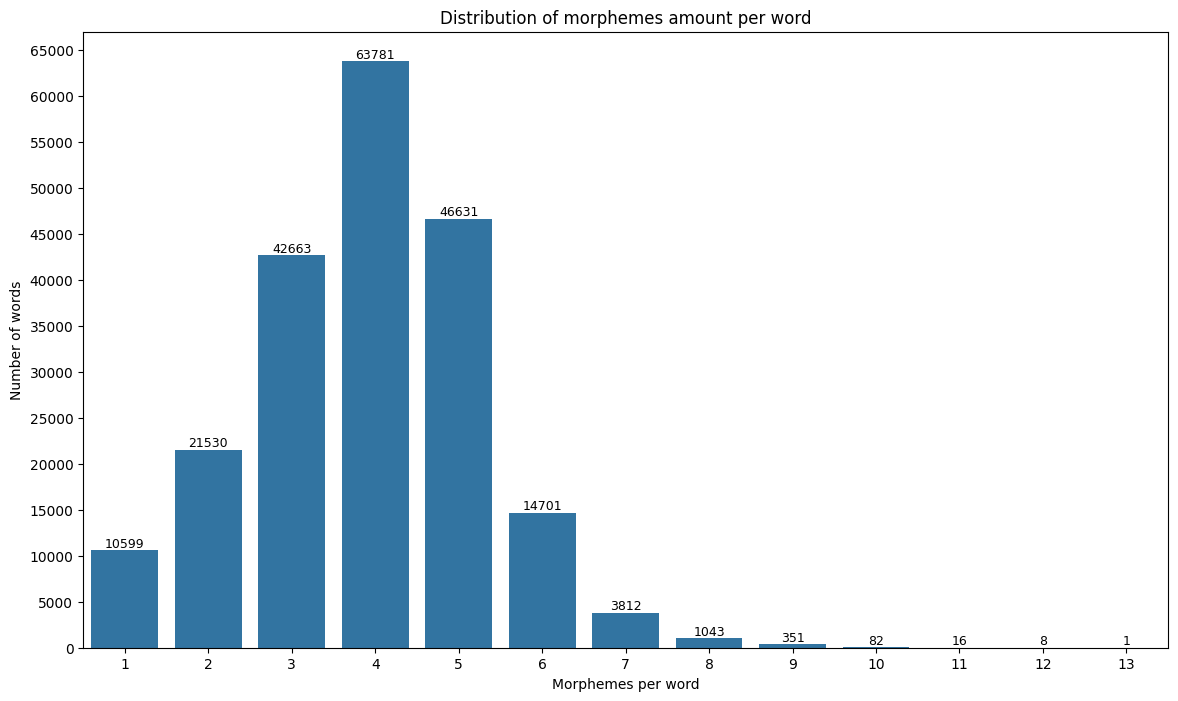

In [23]:
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bar chart
sns.barplot(n_morphemes_value_counts, ax=ax)

# Add labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X position
            p.get_height(),  # Y position
            int(p.get_height()),  # Text (count)
            ha='center', va='bottom', fontsize=9)  # Alignment

# Labels and title
ax.set_xlabel("Morphemes per word")
ax.set_ylabel("Number of words")
ax.set_title("Distribution of morphemes amount per word")

# Set y-axis ticks
ax.set_yticks(np.arange(0, n_morphemes_value_counts.max() + 5000, 5000))

plt.show()

### WordCloud

In [24]:
text = ','.join(morphemes_val_count.loc[:50, 'morphemes'])
text

'ий,ти,а,н,о,ува,я,к,ся,и,по,ов,за,ен,нн,не,ість,роз,ви,на,0,в,юва,у,з,пере,і,ськ,с,при,про,ик,ова,від,е,ин,об,іш,іj,під,ну,л,т,ч,до,ва,льн,ів,ок,ат,енн'

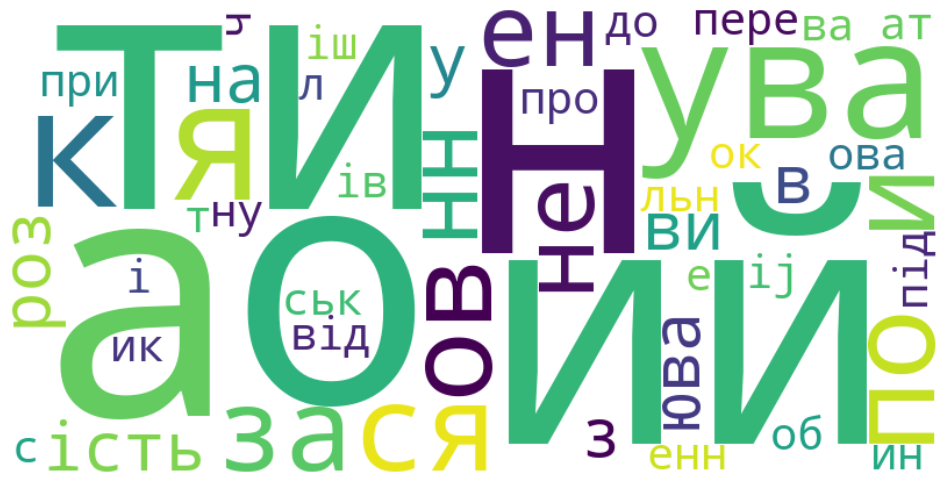

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axis
plt.show()